# Prétraittement des données

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
% matplotlib inline
np.set_printoptions(precision=2,linewidth=500,suppress=True)

"""pour que les dataFrame ne soient pas trop coupées dans la console"""
pd.set_option('expand_frame_repr', False)

## Premièr coup d'oeil sur la dataframe

In [3]:
''' on transforme les données csv en une dataFrame pandas. '''
df = pd.read_csv("data/loan_data.csv")
''' on supprime des colonnes inutiles '''
df =df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1','Loan_ID'])
df.head(10) #10 premières lignes

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,Y
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,Y


In [4]:
df.tail(10) #10 dernières lignes

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,N
605,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,Y
606,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,N
608,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
"type des variables"
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

***A vous:*** Indiquez ($1\heartsuit$) quelles sont les variables quantitatives et qualitatives? Donnez ($2\diamondsuit$) leur signification quand vous pouvez?

## Observation des variables  qualitatives

Comptons les occurences d'une variable qualitative avec `value_counts(dropna=False)`.  Un conseil:  toujours mettre dropna=False, ce qui permet de compter les Nan. Ça évite de les oublier.

In [6]:
"je récupère la colonne. J'obtien une Series"
property_Area=df['Property_Area']
" value_counts() renvoie aussi une Serie."
property_Area_count=property_Area.value_counts(dropna=False) 
print(type(property_Area_count))
property_Area_count

<class 'pandas.core.series.Series'>


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [7]:
" je  récupère un élément de la Series"
property_Area_count['Semiurban']

233

In [8]:
df['Gender'].value_counts(dropna=False) # -> 13 Nan ! (des trans-genre ?)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

In [9]:
df['Loan_Status'].value_counts(dropna=False)

Y    434
N    180
Name: Loan_Status, dtype: int64

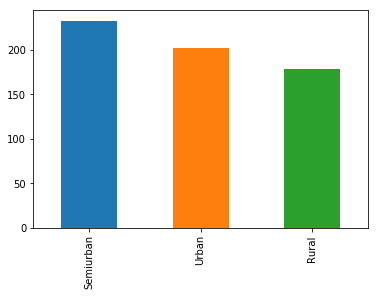

In [10]:
df['Property_Area'].value_counts(dropna=False).plot(kind='bar');

## Nettoyage de donnée

En anglais on dit "Data Munging". Il faut le faire dès maintenant sinon on va galérer par la suite.
On fait ici quelque chose de très basique, on enlève les nan variable par variable, en les remplaçant
par une valeur par défaut (la plus vraisemblable). On pourrait faire mieux, en remplaçant les Nan par des moyennes.

In [11]:
"combien de données manquantes par variable (=par colonne)"
df.apply(lambda col: sum(col.isnull()), axis=0)

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

On remplace les null par une valeur par défaut

In [12]:
loanAmountMean=df['LoanAmount'].mean()
df['LoanAmount'].fillna(loanAmountMean, inplace=True)
Loan_Amount_TermMean=df['Loan_Amount_Term'].mean()
df['Loan_Amount_Term'].fillna(Loan_Amount_TermMean, inplace=True)
df['Gender'].fillna('Male', inplace=True)
df['Dependents'].fillna(0, inplace=True)
df['Self_Employed'].fillna(0, inplace=True)
df['Married'].fillna("No", inplace=True)
df['Credit_History'].fillna(1, inplace=True)

In [13]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

On a maintenant une dataframe sans valeurs manquantes. On aurait pu aussi supprimer les lignes où il y a des Nan: `df.dropna(axis=0, inplace=True)` 
ou toutes les colonnes où il y a des Nan: `df.dropna(axis=1, inplace=True)` mais cela aurait été douloureux pour nos données.

Mais le netoyage n'est pas fini.  On repère un GAG dans la variable 'Self_Employed' : il y a des 'Yes', des 'False' et des '0' (représentant sans doute des False). On arrange cela pour éviter des plantages plus loin. 

In [14]:
df['Self_Employed'].value_counts(dropna=False)

No     500
Yes     82
0       32
Name: Self_Employed, dtype: int64

In [15]:
""" on arrange cela """
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 'Yes', 'No': 'No', 0: 'No'})
df['Self_Employed'].value_counts(dropna=False)

No     532
Yes     82
Name: Self_Employed, dtype: int64

## Observation des variables quantitatives

ApplicantIncome = revenu du demandeur du prêt. La colonne `df['ApplicantIncome']` est une série de float. On peut la ploter mais cela n'a pas beaucoup de sens. Il vaut mieux en faire un histrogramme. 

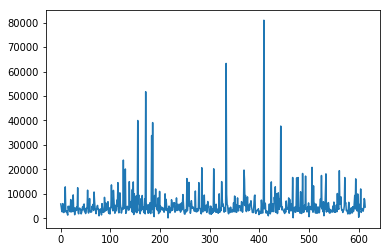

In [16]:
df['ApplicantIncome'].plot()

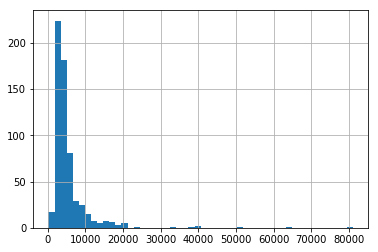

In [17]:
df['ApplicantIncome'].hist(bins=50)

In [18]:
"Une Série de float peut se décrire comme ceci"
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

***A vous:*** Que signifie les pourcentages? ($1\heartsuit$)

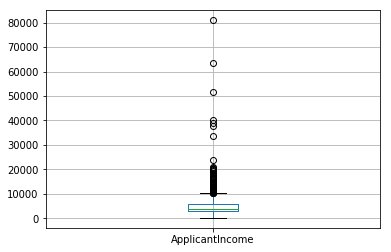

In [19]:
"Une Série de float peut se décrire avec une boite à moustache"
df.boxplot(column='ApplicantIncome');

In [20]:
"""correlation entre variables quantitatives"""
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,0.011134
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.001431
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.000432
Credit_History,-0.018615,0.011134,-0.001431,0.000432,1.000000


***A vous:*** les plus grosses corrélations s'expliquent-elles  naturellement? ($3\diamondsuit$)

Il faudrait aussi étudier les correlations en prenant en compte les variables qualitative !  (voir à la fin)

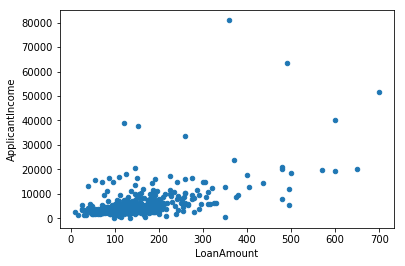

In [21]:
""" affichons les valeurs d'un couple de variables quantitatives"""
ax=df.plot(kind="scatter",x="LoanAmount",y="ApplicantIncome")

## Croisement de deux variables

### boites à moustaches regroupées

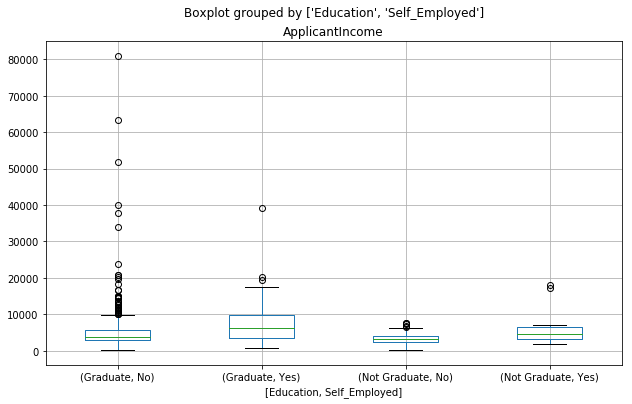

In [22]:
" boite à moustache croisée"
df.boxplot(column='ApplicantIncome',by=["Education","Self_Employed"], figsize=(10,6));

### Effectifs croisés

In [23]:
crossNb = pd.crosstab(df['Gender'], df['Loan_Status'])
crossNb    

Loan_Status,N,Y
Gender,,
Female,48,64
Male,132,370


In [24]:
"""Remarque : dès que pandas envoie un tableau, c'est un dataFrame"""
print(type(crossNb))
"récupération d'une valeur"
crossNb.loc['Female','N']

<class 'pandas.core.frame.DataFrame'>


48

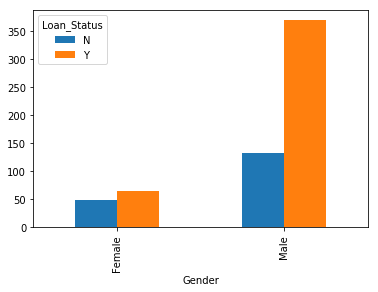

In [25]:
crossNb.plot(kind='bar');

## pivot_table

Une `pivot_table` analyse l'effet de deux variables qualitatives sur une troisième quantitative.
 Cela correspond aux arbres dans les exo de probabilités conditionnelles. Par exemple on regarde :
    
```
        CreditHistory     Gender     nb de prêt accepté

                        --- H ---       a
                        |
        ---- Yes ----   |
        |               --- F ---       b
 ------ |
        |               --- H ---       c
        ---- No ------  |
                        |
                        |
                        --- F ---       d
```



In [26]:
pivotTable = df.pivot_table(values='Loan_Status', index=['Credit_History','Gender'], aggfunc=lambda group: group.map({'Y': 1, 'N': 0}).sum())
"""
La fonction d'aggrégation "aggfunc" s'applique à un groupe déterminé par un Credit_History  et un Gender donnés.
Ici les valeurs des éléments de ce groupe étant Y ou N, on les transforme d'abord en 1 ou 0 avant de les sommer.
On peut remplacer sum par mean. Dans ce cas là, on divise par la taille du groupe. """

pivotTable

Loan_Status
Credit_History Gender             
0.0            Female            6
               Male             37
1.0            Female           58
               Male            333

récupération d'une valeur: Loan_Status    37
Name: (0.0, Male), dtype: int64


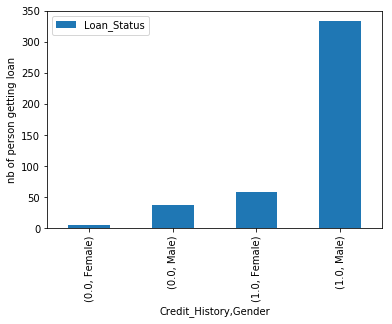

In [27]:
print("récupération d'une valeur:",pivotTable.loc[0.,"Male"])

""" les Series numériques  a deux niveaux d'indices se plotent:"""
ax=pivotTable.plot(kind='bar')
ax.set_ylabel('nb of person getting loan');

***A vous:*** ($6\diamondsuit$)  Y-a-t'il des inégalité homme/femme en matière de ApplicantIncome, Education, de Self_Employed.
AIDE : vous pouvez faire des pivot_table et crosstab ou bien découper la dataFrame en deux: 

        df_male= df.loc[df.Gender=='Male']
        df_female= df.loc[df.Gender == 'Female']
        

## Ajout et modification de variables quantitative

In [28]:
""" il y a des chance de la banque regarde le revenu global du foyer"""
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
""" plus on gagne et plus on peut emprunter. La variable suivante devrait être utile"""
df['LoanAmount/TotalIncome'] =  df['LoanAmount']/ df['TotalIncome']
df.loc[:5,['ApplicantIncome','CoapplicantIncome','TotalIncome','LoanAmount/TotalIncome']]

,ApplicantIncome,CoapplicantIncome,TotalIncome,LoanAmount/TotalIncome
0,5849,0.0,5849.0,0.025032
1,4583,1508.0,6091.0,0.021015
2,3000,0.0,3000.0,0.022000
3,2583,2358.0,4941.0,0.024287
4,6000,0.0,6000.0,0.023500
5,5417,4196.0,9613.0,0.027775


In [29]:
df['LoanAmount/TotalIncome'].describe()

count    614.000000
mean       0.024017
std        0.008947
min        0.002523
25%        0.019362
50%        0.024174
75%        0.028345
max        0.082712
Name: LoanAmount/TotalIncome, dtype: float64

Sur la description, on remarque que  std (standard deviation=écart type) de LoanAmount/TotalIncome est petite (au vu de sa moyenne).
     Donc notre nouvelle variable est peut dispersée (assez proche d'une constante).
     on remarque aussi qu'on n'a pas max=infinity, donc on n'avait pas de `df['TotalIncome']=0` dans les données (sinon il aurait fallu mieux nettoyer)

In [30]:
"""ajoutons une variable d'interaction"""
df['Graduate&Self_Employed']=df['Education'].map({'Graduate':1.,'Not Graduate':0.}) * df['Self_Employed'].map({'Yes':1.,'No':0.})
df['Graduate&Self_Employed'].value_counts(dropna=False)

0.0    549
1.0     65
Name: Graduate&Self_Employed, dtype: int64

Nous avons vu que les incomes était très divers, avec de très grandes valeurs. Une façons de traiter cela est simplement de passer les revenu au log. C'est un peu bizarre à première vue (on ne gagne pas des log de dollar), mais c'est en fait très proche de la perception qu'on les humains de la richesse. Remplissez ($2\heartsuit$) le tableau suivant puis observez si votre l'échelle est plutôt linéaire ou logaeithmique?
$$
\begin{array}{cccc}
\text{revenu} & \to & \text{perception} \\
300 \$ & \to & \text{ pauvre} \\
 \dots  \$ & \to & \text{classe moyenne} - \\
\dots  \$ & \to & \text{classe moyenne} + \\
\dots  \$ & \to & \text{riche}  \\
\dots  \$ & \to & \text{très riche} 
\end{array}
$$



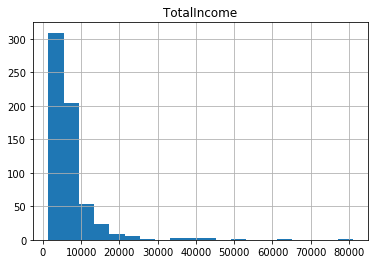

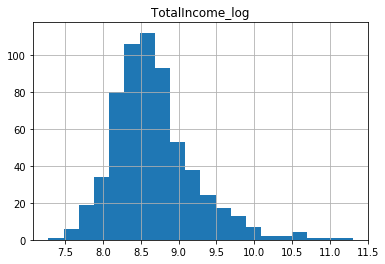

In [31]:
""" le passage au log écrase les  valeurs extrême. L'histogramme a plus une tête de gaussienne"""
df['TotalIncome_log'] = np.log(df['TotalIncome'])
plt.figure(1)
plt.title("TotalIncome")
df['TotalIncome'].hist(bins=20)
plt.figure(2)
plt.title("TotalIncome_log")
df['TotalIncome_log'].hist(bins=20);

Bonne nouvelle: le passage au log permet à l'histogramme de ressempler à une gaussienne. 

## Quantization d'une variable quantitative

Parfois on a envie de transformer une variable quantitatives en variable qualitative
Cette pratique  parait étrange. On y perd forcément de l'information.
 Pourtant c'est très utilisé car elle facilite l'interprétation des variables et des coefficients de regression qui seront calculer par la suite.

pauvre    207
riche     205
moyen     202
Name: ApplicantIncomeQ, dtype: int64


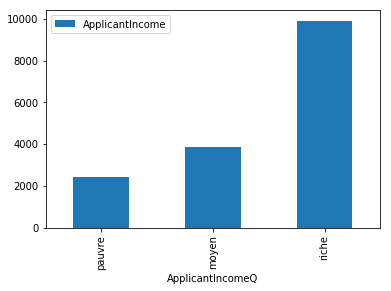

In [32]:
"""il faut mieux séparer par quantile. ici : les 33% les plus pauvre/moyen/riche,"""
df["ApplicantIncomeQ"] = pd.qcut(df.ApplicantIncome, 3, labels=["pauvre", "moyen","riche"])
print(df["ApplicantIncomeQ"].value_counts(dropna=False))
"""regardons le revenu moyen par groupe"""
pivotTable = df.pivot_table(values='ApplicantIncome', index=['ApplicantIncomeQ'], aggfunc=lambda group: group.mean())
pivotTable.plot(kind='bar');

## Toutes les variables doivent être numérique


A la fin, nos modèles ne veulent que des variables numériques,
il faut donc  transformer toutes les variables qualitatives en variable numérique.

### Variables a deux modalités

In [33]:
""" Nous préférons les float 1. et 0. aux entiers qui peuvent créer des problèmes"""
df['Gender'] = df['Gender'].map({'Female': 1., 'Male': 0.})
df['Married'] = df['Married'].map({'Yes': 1., 'No': 0.})
df['Education']=df['Education'].map({'Graduate':1.,'Not Graduate':0.})


""" il y avait un GAG dans 'Self_Employed' des données manquantes avaient été mise à 0.
On avait raté cela dans le data munging, et les deux lignes suivantes créent des Nan !!! -> plantage de nos algos par la suite """
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1., 'No': 0.})

df['Loan_Status'] = df['Loan_Status'].map({'Y': 1., 'N': 0.})

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount/TotalIncome,Graduate&Self_Employed,TotalIncome_log,ApplicantIncomeQ
0,0.0,0.0,0,1.0,0.0,5849,0.0,146.412162,360.0,1.0,Urban,1.0,5849.0,0.025032,0.0,8.674026,riche
1,0.0,1.0,1,1.0,0.0,4583,1508.0,128.000000,360.0,1.0,Rural,1.0,6091.0,0.021015,0.0,8.714568,moyen
2,0.0,1.0,0,1.0,1.0,3000,0.0,66.000000,360.0,1.0,Urban,1.0,3000.0,0.022000,1.0,8.006368,pauvre
3,0.0,1.0,0,0.0,0.0,2583,2358.0,120.000000,360.0,1.0,Urban,1.0,4941.0,0.024287,0.0,8.505323,pauvre
4,0.0,0.0,0,1.0,0.0,6000,0.0,141.000000,360.0,1.0,Urban,1.0,6000.0,0.023500,0.0,8.699515,riche


In [34]:
"vérifions que l'on a pas introduit de nan"
df.apply(lambda line: sum(line.isnull()), axis=0)

Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status               0
TotalIncome               0
LoanAmount/TotalIncome    0
Graduate&Self_Employed    0
TotalIncome_log           0
ApplicantIncomeQ          0
dtype: int64

### Variables a trois modalités et plus

Mais comment fait-on avec les variables à plus de 2 modalités ?
Imaginez par exemple une variable "département". On serait tenté de la coder par une variable numérique "numéro de département".
Mais imaginiez ensuite un modèle logistique ou de regression : le numéro de département serait multiplié par un poids w, et le
résultat devrait être significatif ? C'est absurde !

La solution c'est de transformer chacune des modalités en une variables valant 0 ou 1 (en anglais : dummy variable).
Effectuons cela pour la variable Property_Area

In [35]:
dummies=pd.get_dummies(df["Property_Area"], prefix="PA")
dummies.head()

,PA_Rural,PA_Semiurban,PA_Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [36]:
""" on garde deux modalités """
df["PA_Rural"]=dummies["PA_Rural"]
df["PA_Urban"]=dummies["PA_Urban"]    

On supprime très souvent une dummy variables (en générale celle qui a le plus de 1).  En effet la
      somme des dummies faisant 1, il y en a une de redondance linéaire, et cela rend la matrice des inputs $X$ non inversible. C'est très embêtant pour faire du modèle linéaire ou du GLM, et plus généralement une variable de trop, cela parasite l'interprétation des résultats.  Cependant, lorsqu'on utilise des boite noire comme les réseaux de neurones, ce n'est pas si grave d'avoir de la redondance dans les inputs. 

pour finir traitons la variable Dependents. 3 choix:

*  coder toutes ces modalité avec des dummies variables
*  garder uniquement avec/sans enfants
*  la coder comme une variable numérique. Pour la classe 3+ nous affectons 3.2, ce qui correspond à la moyenne du nombre d'enfant sachant qu'on en a plus de trois (selon l'institut de sondage "pifometre").

Nous gardons la troisième possibilité

In [37]:
"""encore un gag dans les data, le zéro est parfois encodé comme un string, et parfois comme un int """
Dependents_valCounts=df["Dependents"].value_counts(dropna=False)
Dependents_valCounts

0     345
1     102
2     101
3+     51
0      15
Name: Dependents, dtype: int64

In [38]:
Dependents_valCounts.index

Index(['0', '1', '2', '3+', 0], dtype='object')

In [39]:
"""on arrange cela"""
df["Dependents_num"]=df["Dependents"].map({'0':0.,0:0.,'1':1.,'2':2.,'3+':3.2})
df["Dependents_num"].value_counts(dropna=False)

0.0    360
1.0    102
2.0    101
3.2     51
Name: Dependents_num, dtype: int64

## Résumé

In [40]:
"on a au final beaucoup de colonnes"
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome', 'LoanAmount/TotalIncome', 'Graduate&Self_Employed',
       'TotalIncome_log', 'ApplicantIncomeQ', 'PA_Rural', 'PA_Urban',
       'Dependents_num'],
      dtype='object')

Il faut supprimer les variables clairement redondante. 

Et parmis les variables "incomes": "ApplicantIncome", "CoapplicantIncome", "TotalIncome_log" "ApplicantIncomeQ",  "LoanAmount/TotalIncome", on décide d'en évacuer deux.  

In [41]:
""" on laisse tomber celles qui nous paraissent vraiment redondantes"""
df_final=df.drop([
                  'CoapplicantIncome', # redondant à cause de TotalIncome et ApplicantIncome
                  'ApplicantIncomeQ', # ce  n'était pas une bonne idée de quantizer cette variable
                  'Property_Area', # redondant car on a mis des dummies variables
                  'Dependents' # redondant car on l'a numérisée
                 ], axis=1, inplace=False)


***A vous:*** ($2\heartsuit$) A quoi sert l'option `inplace=False` ci-dessus. Quel est sont avantage? Quand quel cas il vaudrait mieux utiliser `inplace=True`

In [42]:
df_final.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,LoanAmount/TotalIncome,Graduate&Self_Employed,TotalIncome_log,PA_Rural,PA_Urban,Dependents_num
0,0.0,0.0,1.0,0.0,5849,146.412162,360.0,1.0,1.0,5849.0,0.025032,0.0,8.674026,0,1,0.0
1,0.0,1.0,1.0,0.0,4583,128.000000,360.0,1.0,1.0,6091.0,0.021015,0.0,8.714568,1,0,1.0
2,0.0,1.0,1.0,1.0,3000,66.000000,360.0,1.0,1.0,3000.0,0.022000,1.0,8.006368,0,1,0.0
3,0.0,1.0,0.0,0.0,2583,120.000000,360.0,1.0,1.0,4941.0,0.024287,0.0,8.505323,0,1,0.0
4,0.0,0.0,1.0,0.0,6000,141.000000,360.0,1.0,1.0,6000.0,0.023500,0.0,8.699515,0,1,0.0


In [43]:
corr=df_final.corr()

Affichons la matrice complète en utilisant `seaborn`.

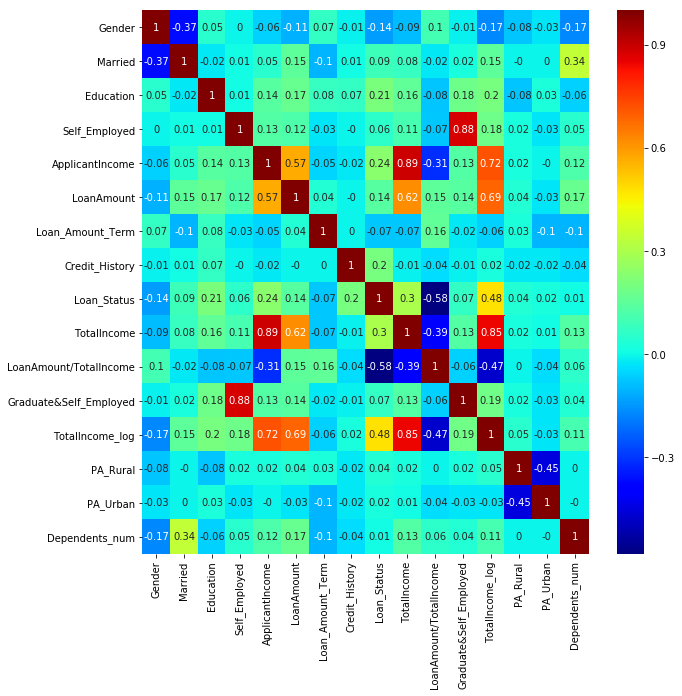

In [47]:
import seaborn as sns
plt.figure(1,figsize=(10,10))
sns.heatmap(np.round(corr,2), annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns,cmap="jet")

Moins tape à l'oeil, mais plus utile: affichons les 20 plus grosses correlations non-trivialle. 

In [54]:
""" je sépare la dataframe en values et index (car je maitrise mieux numpy) """
corr_matrix=corr.values
names=corr.index

n=len(corr_matrix)
corr_as_list=[]
for i in range(n):
    for j in range(n):
        if i!=j:
            corr_as_list.append((np.round(corr_matrix[i,j],4),names[i],names[j]))
corr_as_list.sort(key=lambda triplet:-triplet[0])   

corr_as_list[:20]

[(0.893, 'ApplicantIncome', 'TotalIncome'),
 (0.893, 'TotalIncome', 'ApplicantIncome'),
 (0.8764, 'Self_Employed', 'Graduate&Self_Employed'),
 (0.8764, 'Graduate&Self_Employed', 'Self_Employed'),
 (0.8529, 'TotalIncome', 'TotalIncome_log'),
 (0.8529, 'TotalIncome_log', 'TotalIncome'),
 (0.7178, 'ApplicantIncome', 'TotalIncome_log'),
 (0.7178, 'TotalIncome_log', 'ApplicantIncome'),
 (0.6876, 'LoanAmount', 'TotalIncome_log'),
 (0.6876, 'TotalIncome_log', 'LoanAmount'),
 (0.6201, 'LoanAmount', 'TotalIncome'),
 (0.6201, 'TotalIncome', 'LoanAmount'),
 (0.5656, 'ApplicantIncome', 'LoanAmount'),
 (0.5656, 'LoanAmount', 'ApplicantIncome'),
 (0.4834, 'Loan_Status', 'TotalIncome_log'),
 (0.4834, 'TotalIncome_log', 'Loan_Status'),
 (0.3355, 'Married', 'Dependents_num'),
 (0.3355, 'Dependents_num', 'Married'),
 (0.2956, 'Loan_Status', 'TotalIncome'),
 (0.2956, 'TotalIncome', 'Loan_Status')]

***Exo:*** 

* $(1\heartsuit)$   Heuu, est-ce qu'on a pas fait une erreur de méthodologie ci-dessus? 
*  $(1\heartsuit)$ Parmi c es grosses correlations : quels sont les correlations triviales que nous avons provoquée en rajoutant des variables ?
* $(1\heartsuit)$ Quelles sont les correlations naturelles que l'on comprend facilement avec le bon sens ?

* $(2\heartsuit)$ Dressez la liste des 10 plus grosses correlation avec l'output `loan_status`. 

* $(1\heartsuit)$ La variable mystérieuse 'Credit_History' agit-elle en faveur ou en défaveur du demander du prêt? 

## Exportons notre travail

In [72]:
""" on n'exporte pas l'index car c'est des entiers consécutifs """
df_final.to_csv("data/loan_data_preprossed.csv",index=False)
""" attention: certain système d'exploitation refuse d'écraser un fichier existant. Vérifiez toujours.""";